# Developing Pyhon Raster Functions - Pixel Blocks and Metadata
This notebook serves as a tutorial on how to use the exported ```pixel_blocks``` and ```metadata``` to create a Python Raster Function.

## Imports

We use ```os``` and ```pickle``` to get the data. We will be working with numerical arrays with ```numpy``` and date objects with ```datetime```.

In [89]:
import numpy as np
import datetime
import os
import pickle

## Debug Logs

We are sending debug logs into the debug logs folder.

In [90]:
debug_logs_directory = r'C:\Users\greg6750\Documents\IPython Notebooks\developing-with-imagery\Week 4\debug'

# Examining the Pixel Block Data Structure

I will read in the ```pixel_blocks```. This allows me to understand the structure of the pixel blocks and will facilitate algorithm development.

In [91]:
filename = 'BaseDebugTemplate_2019_Dec_26_11_48_51pix_blocks.p'
pickle_file = os.path.join(debug_logs_directory, filename)
pix_blocks = pickle.load(open(pickle_file,"rb"))
print(type(pix_blocks))
print(pix_blocks)

<class 'tuple'>
(array([[[2.78833300e-01, 2.81005532e-01, 2.73104340e-01, ...,
         2.73963690e-01, 2.87546098e-01, 2.94205993e-01],
        [2.86591262e-01, 2.91914433e-01, 2.80408770e-01, ...,
         2.77592003e-01, 2.88620263e-01, 2.94038922e-01],
        [2.89384127e-01, 2.97953695e-01, 2.84800947e-01, ...,
         2.82246798e-01, 2.95662105e-01, 2.98431098e-01],
        ...,
        [1.63585693e-01, 1.63251504e-01, 1.65686324e-01, ...,
         2.20564991e-01, 2.23763660e-01, 2.33598366e-01],
        [1.64039239e-01, 1.63394734e-01, 1.66283086e-01, ...,
         2.18106315e-01, 2.22164318e-01, 2.31068075e-01],
        [1.66092113e-01, 1.61699921e-01, 1.62105724e-01, ...,
         2.15552151e-01, 2.20708206e-01, 2.29158431e-01]],

       [[2.63460577e-01, 2.63937980e-01, 2.57278085e-01, ...,
         2.59903848e-01, 2.73486257e-01, 2.80814558e-01],
        [2.72698522e-01, 2.75515258e-01, 2.62983173e-01, ...,
         2.64200568e-01, 2.73892075e-01, 2.77401060e-01],
        

# Casting to a numpy array

TJe ```pix_blocks``` object is a tuple that holds a numpy array (I don't know why Esri does this). I will recast it to a numpy array and then I can see this is actually a 4-dimmentional array.

In [92]:
pix_array = np.asarray(pix_blocks)
print(type(pix_array))
print("Shape: " + str(pix_array.shape))

<class 'numpy.ndarray'>
Shape: (41, 9, 151, 246)


# Viewing the bands

I will use ```matplotlib``` to visualize the bands. Here I loop over all the bands in the timestemp.

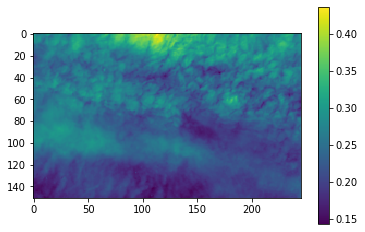

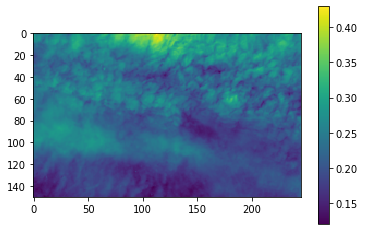

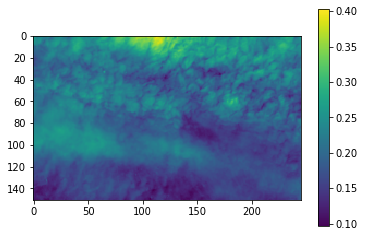

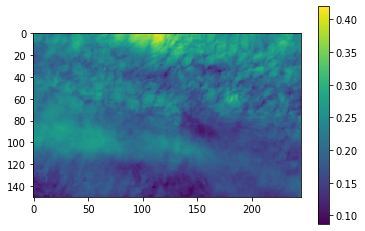

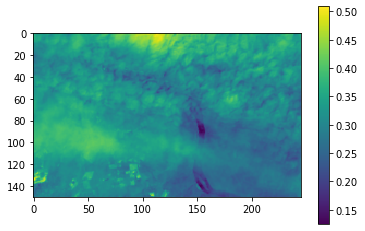

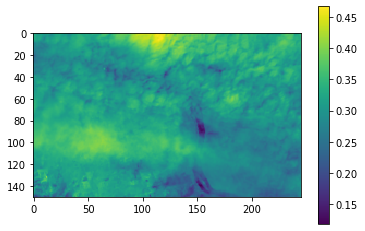

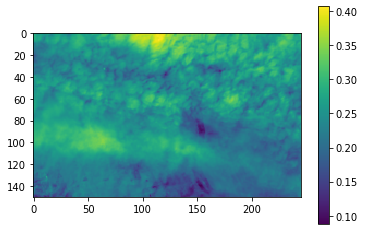

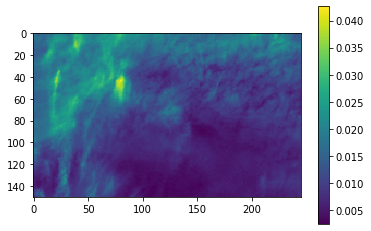

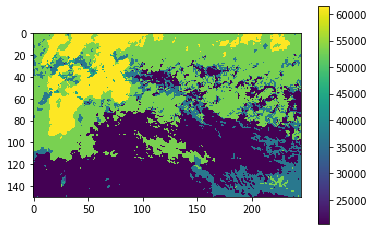

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt  

for i in range(9):
    plt.imshow(pix_array[0,i,:,:])
    plt.colorbar()
    plt.show()

# Examining the Metadata Structure

I will read in the metadata structure to examine how metadata is strutured within a Python Raster Function

In [94]:
time_filename = 'BaseDebugTemplate_2019_Dec_26_11_48_51pix_time.p'
pickle_file = os.path.join(debug_logs_directory, time_filename)
metadata = pickle.load(open(pickle_file,"rb"))
metadata

[42119.66481383102,
 42135.66462915509,
 41735.665394375,
 41767.66502144676,
 41671.666023391204,
 41719.66556653935,
 41751.6652046875,
 42103.664852835645,
 41687.66586372685,
 42087.66496130787,
 41703.6656850463,
 42071.665063726854,
 42055.665158275464,
 42039.665240173614,
 41975.66541693287,
 41927.665449050925,
 42023.66528021991,
 41959.66542990741,
 41991.665374537035,
 42311.66536840278,
 42007.66531497685,
 41799.66506641204,
 42199.66497052083,
 41863.665325104164,
 42279.66530021991,
 41895.66538886574,
 41943.66540938657,
 42167.66477804398,
 42263.665248275465,
 41831.66519047454,
 42295.66531074074,
 41879.66533837963,
 41911.66538644676,
 42215.665021643516,
 41783.66494530092,
 41847.665227453705,
 42151.664642083335,
 42183.66484800926,
 42231.66508953704,
 42247.66515474537,
 41815.66508684028]

# Developing the algorithm

Now that we see what data get pulled into a raster function, the algorithm can be developed.

## User Inputs

We define teh user inputs:
- start_day
- start_year
- end_day
- end_year
- pixel_percentile

In [95]:
start_day = 120
start_year = 2014
end_day = 240
end_year = 2015
pixel_percentile = 50

# Parsing the ```acquisitiondate```

In [96]:
t_vals = [j for j in metadata]
print(t_vals)

[42119.66481383102, 42135.66462915509, 41735.665394375, 41767.66502144676, 41671.666023391204, 41719.66556653935, 41751.6652046875, 42103.664852835645, 41687.66586372685, 42087.66496130787, 41703.6656850463, 42071.665063726854, 42055.665158275464, 42039.665240173614, 41975.66541693287, 41927.665449050925, 42023.66528021991, 41959.66542990741, 41991.665374537035, 42311.66536840278, 42007.66531497685, 41799.66506641204, 42199.66497052083, 41863.665325104164, 42279.66530021991, 41895.66538886574, 41943.66540938657, 42167.66477804398, 42263.665248275465, 41831.66519047454, 42295.66531074074, 41879.66533837963, 41911.66538644676, 42215.665021643516, 41783.66494530092, 41847.665227453705, 42151.664642083335, 42183.66484800926, 42231.66508953704, 42247.66515474537, 41815.66508684028]


# Turning dates into array of years and days since January 1


In [97]:
base_date = datetime.datetime(1900, 1, 1) - datetime.timedelta(days=2)
year_doy = np.zeros((len(t_vals), 2))
year_doy[:, 0] = [(base_date + datetime.timedelta(days=t)).year for t in t_vals]
year_doy[:, 1] = [(base_date + datetime.timedelta(days=t)).timetuple().tm_yday for t in t_vals]
print(year_doy)

[[2015.  115.]
 [2015.  131.]
 [2014.   96.]
 [2014.  128.]
 [2014.   32.]
 [2014.   80.]
 [2014.  112.]
 [2015.   99.]
 [2014.   48.]
 [2015.   83.]
 [2014.   64.]
 [2015.   67.]
 [2015.   51.]
 [2015.   35.]
 [2014.  336.]
 [2014.  288.]
 [2015.   19.]
 [2014.  320.]
 [2014.  352.]
 [2015.  307.]
 [2015.    3.]
 [2014.  160.]
 [2015.  195.]
 [2014.  224.]
 [2015.  275.]
 [2014.  256.]
 [2014.  304.]
 [2015.  163.]
 [2015.  259.]
 [2014.  192.]
 [2015.  291.]
 [2014.  240.]
 [2014.  272.]
 [2015.  211.]
 [2014.  144.]
 [2014.  208.]
 [2015.  147.]
 [2015.  179.]
 [2015.  227.]
 [2015.  243.]
 [2014.  176.]]


# Filter the pixels and acquisition date on the inputs values 

In [98]:
filtered_year_doy = [[idx, ym] for idx, ym in enumerate(year_doy) if
                     ((ym[0] >= start_year and ym[0] <= end_year) and (
                             ym[1] >= start_day and ym[1] <= end_day))]

year_doy_filtered_indices = [idx[0] for idx in filtered_year_doy]
pix_array_filtered = pix_array[year_doy_filtered_indices, :, :, :]

pix_array_dim = pix_array_filtered.shape
num_bands = pix_array_dim[1] - 1
num_squares_x = pix_array_dim[2]
num_squares_y = pix_array_dim[3]
print(pix_array_dim)

(15, 9, 151, 246)


# Defining a function to mask out bad pixels

I define an ```apply_mask``` function that will flag all bad pixel values.

In [99]:
LANDSAT_8_CLEAR_PIX_VALS = [20480, 20484, 20512, 23552]#[2720, 2724, 2728, 2732]
FILTER_VAL = -3001
QA_BAND_NUM = 9

def apply_mask(tct_stack, bqa_stack, clear_code):
    tct_stack[~np.isin(bqa_stack, clear_code)] = FILTER_VAL
    return tct_stack.astype('float')

Here, I apply the mask

In [100]:
# QA band index
qa_band_ind = QA_BAND_NUM - 1

# Defining the QA band as its own array
bqa_stack = pix_array_filtered[:, qa_band_ind, :, :]

# Removing the QA band from the ixel band
pix_array_filtered = pix_array_filtered[:, 0:qa_band_ind, :, :]

# Expand the dimmensions of the array to match the inputs
bqa_stack = np.expand_dims(bqa_stack, 1)

# Repreat the bqa array so that it applies to app bands
bqa_stack = np.repeat(bqa_stack, qa_band_ind, 1)

# Apply the filter function
pix_array_filtered = apply_mask(pix_array_filtered,
                                bqa_stack,
                                LANDSAT_8_CLEAR_PIX_VALS)

I would generally use **masked arrays** for this calculation with numpy,bute **masked arrays** don't support *NaNs*. So, I convert all the flagged values to ```NaN``` and thenI will uses ```numpy.nanpercentile``` for the calculation. 

In [101]:
masked_pix_array = np.ma.masked_where(pix_array_filtered == FILTER_VAL, pix_array_filtered)
mdata = np.ma.filled(masked_pix_array, np.nan)

Here I use ```nanpercentile``` for the calculation and use the time magic to time how long it takes to execute.

In [102]:
%%time

percentile_raster = np.nanpercentile(mdata,
                              pixel_percentile,
                              axis=0)


Wall time: 19.5 s


# Reviewing the Results

First, let's look at the dimensions of the result. There should be 12 bands.

In [103]:
percentile_raster.shape

(8, 151, 246)

We can also plot the results. This is nice, but sometimes it's not too helpful.

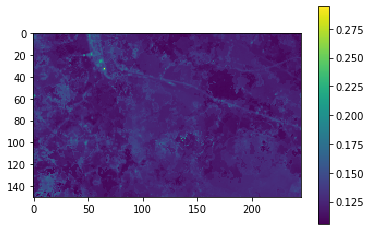

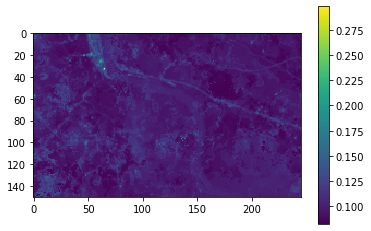

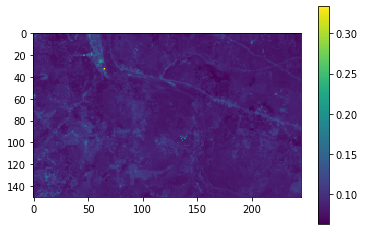

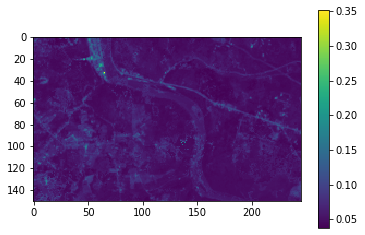

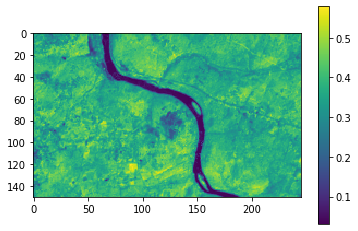

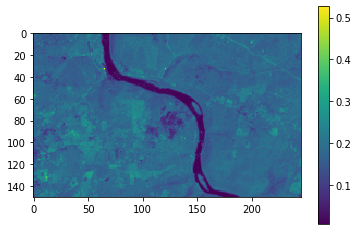

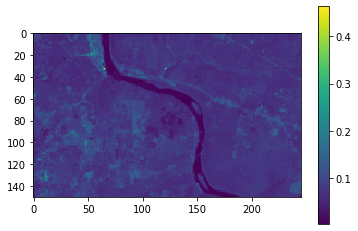

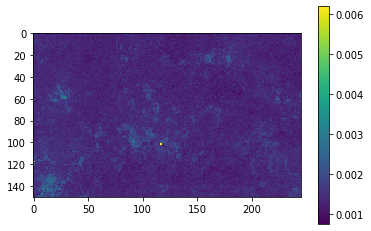

In [104]:
for i in range(8):
    plt.imshow(percentile_raster[i,:,:])
    plt.colorbar()
    plt.show()

What is most helpful is probably picking a pixel, doing the calculation, and comparing it to the result. Here, we will take a random ```x,y``` location and verify the results.

In [105]:
x,y = (2,2)

In [106]:
pix_array_filtered[:,0,x,y]

array([-3.00100000e+03, -3.00100000e+03,  7.30422735e-01, -3.00100000e+03,
        1.53726682e-01, -3.00100000e+03,  1.25241637e-01,  1.17649809e-01,
        1.17243789e-01,  1.18237942e-01,  1.44511268e-01, -3.00100000e+03,
       -3.00100000e+03,  1.49262041e-01, -3.00100000e+03])

The array at that location is:

In [107]:
mdata[:,0,x,y]

array([       nan,        nan, 0.73042274,        nan, 0.15372668,
              nan, 0.12524164, 0.11764981, 0.11724379, 0.11823794,
       0.14451127,        nan,        nan, 0.14926204,        nan])

The result at that location is

In [108]:
percentile_raster[0,x,y]

0.13487645238637924

Do we get the same value of we do the calculation?

In [109]:
np.nanpercentile(mdata[:,0,x,y], 50)

0.13487645238637924